In [1]:
import pandas as pd
import california_housing_data

housing = california_housing_data.load_data()
# Adjust median income features.
housing = california_housing_data.adjust_median_income(housing)

n_samples = len(housing)

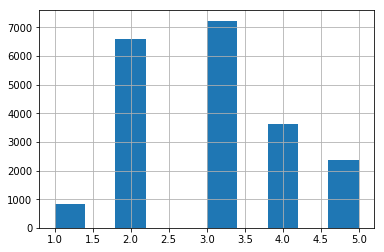

In [3]:
import matplotlib.pyplot as plt

housing['income_cat'].hist()
plt.show()

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified sampling makes training and whole dataset same distribution.
split = StratifiedShuffleSplit(n_splits=1,
                               test_size=0.2,
                               random_state=42)
# Generate indices to split data into training and test set.
for train_indices, test_indices in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_indices]
    strat_test_set = housing.loc[test_indices]

In [5]:
housing['income_cat'].value_counts() / n_samples

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [7]:
# Remove a income_cat column after adjusting.

for dataset in (strat_train_set, strat_test_set):
    dataset.drop('income_cat', axis=1, inplace=True)